#             Digital Signal Processing Project:

## Convolution :

In [ ]:
#k_max = 10
#np.sum([k * delta(n - k) for k in range(k_max + 1)], axis=0)
#unit_step(n - 1)
#5 * delta(n - 5)


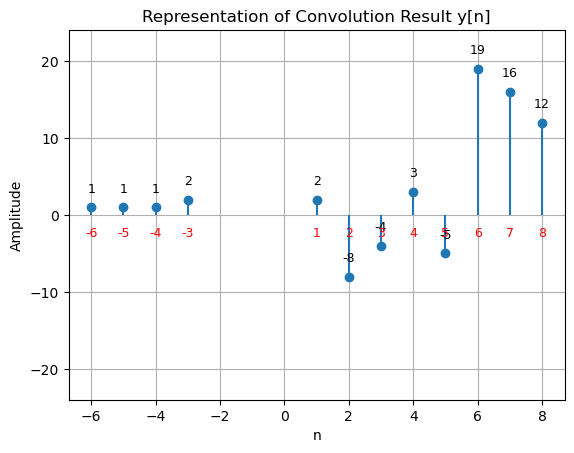

y[n] (Result of x[n] * h[n]): [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  2  0  0  0  2 -8 -4
  3 -5 19 16 12  0  0  0  0  0  0  0  0  0  0]
Delta positions in y[n]: [-6 -5 -4 -3  1  2  3  4  5  6  7  8]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the unit step function
def unit_step(n):
    return np.where(n >= 0, 1, 0)

# Define delta function (discrete impulse)
def delta(n):
    return np.where(n == 0, 1, 0)

# Function to find positions of delta impulses
def find_delta_positions(signal):
    return np.where(signal != 0)[0]

# Question 
n = np.arange(-10, 10)  # Define a range for n
x = delta(n + 5) + 2 * delta(n - 2) - 10 * delta(n - 3) + 4 * delta(n - 4) + 5 * delta(n - 5) + 6 * delta(n - 6)  # x[n]
h = delta(n + 1) + delta(n) + delta(n - 1) + 2 * delta(n - 2)  # h[n]
y = np.convolve(x, h, mode='full')  # Convolution
n_y = np.arange(2 * n[0], 2 * n[-1] + 1) 

# Find positions and amplitudes
delta_positions = n_y[find_delta_positions(y)]
amplitudes = y[y != 0]

# Plot the convolution result
plt.stem(delta_positions, amplitudes, basefmt=" ")
plt.title("Representation of Convolution Result y[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid()

# Add annotations for each value (amplitude)
for pos, amp in zip(delta_positions, amplitudes):
    plt.text(pos, amp +1.5, str(amp), ha='center', va='bottom', fontsize=9)

# Add annotations for n values at the bottom
for pos in delta_positions:
    plt.text(pos, -1.5, str(pos), ha='center', va='top', fontsize=9, color='red')

# Adjust plot limits
plt.ylim(-(max(amplitudes) + 5), max(amplitudes) + 5)
plt.show()

# Output results with delta positions
print("y[n] (Result of x[n] * h[n]):", y)
print("Delta positions in y[n]:", delta_positions)


## Spectrum

### Bilateral:

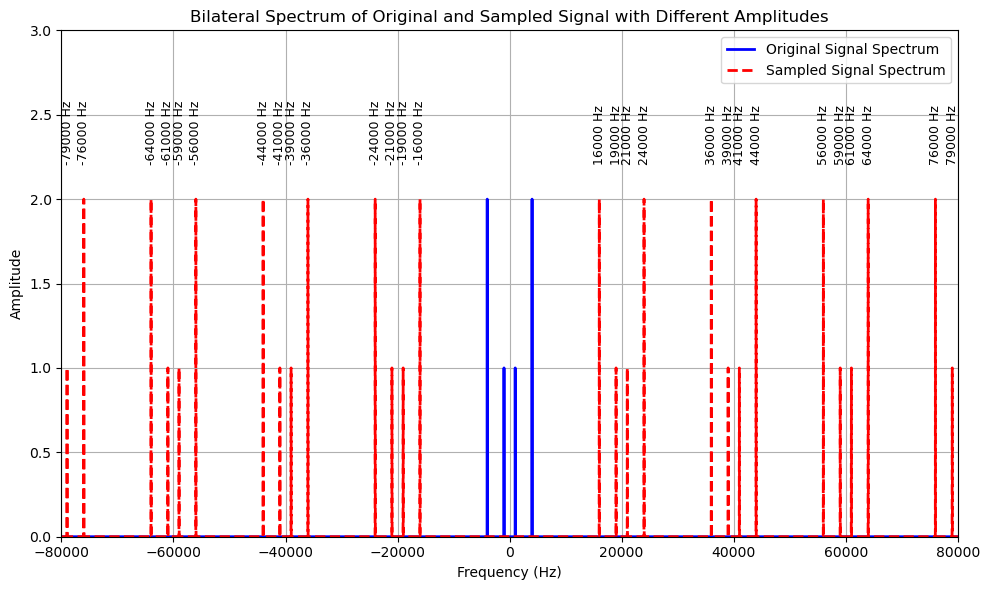

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
frequencies = [1000, 4000]  # List of original signal frequencies (in Hz)
amplitudes = [1, 2]  # Corresponding amplitudes for each frequency
fs = 20000  # Sampling frequency (in Hz)

# Frequency range constant
FREQ_RANGE = 80000  # Frequency range (in Hz) for plotting from -FREQ_RANGE to FREQ_RANGE

# Check SHANON Criterion
f_max = max(frequencies)  # Maximum frequency in the signal
if fs < 2 * f_max:
    raise ValueError(
        f"Sampling frequency (fs={fs} Hz) must be at least twice the maximum signal frequency (2*f_max={2*f_max} Hz)."
    )

# Frequency range for plotting (Increase resolution to 10,000 points)
f_range = np.linspace(-FREQ_RANGE, FREQ_RANGE, 10000)

# Original signal spectrum: spikes at each frequency in the list with corresponding amplitudes
original_spectrum = np.zeros_like(f_range)
for f, amp in zip(frequencies, amplitudes):
    original_spectrum[np.abs(f_range - f) < 10] = amp  # Approximate spike at +f
    original_spectrum[np.abs(f_range + f) < 10] = amp  # Approximate spike at -f

# Sampled signal spectrum (replicating original spectrum at multiples of fs, excluding original spikes)
sampled_spectrum = np.zeros_like(f_range)
spike_freqs = []

# Adjust replication range based on FREQ_RANGE and fs
n_max = int(np.ceil(FREQ_RANGE / fs))  # Max range of replication for spikes

# Generate the replicated spectra for multiples of fs (exclude n=0 for original frequencies)
for n in range(-n_max, n_max + 1):
    if n == 0:
        continue  # Skip n=0 to avoid duplicating original frequencies
    for f, amp in zip(frequencies, amplitudes):
        # Approximate spikes at f + n*fs and -f - n*fs
        sampled_spectrum[np.abs(f_range - (n * fs + f)) < 10] = amp
        sampled_spectrum[np.abs(f_range + (n * fs + f)) < 10] = amp
        
        # Store the spike frequencies for labeling
        spike_freqs.append(n * fs + f)
        spike_freqs.append(-n * fs - f)

# Plotting the spectra
plt.figure(figsize=(10, 6))

# Plot the original signal spectrum
plt.plot(f_range, original_spectrum, label="Original Signal Spectrum", color="blue", lw=2)

# Plot the sampled signal spectrum
plt.plot(f_range, sampled_spectrum, label="Sampled Signal Spectrum", color="red", linestyle="--", lw=2)

# Adding text annotations for each spike
for freq in spike_freqs:
    # Only annotate if the frequency is within the plotted range
    if -FREQ_RANGE <= freq <= FREQ_RANGE:
        plt.text(freq, max(amplitudes) + 0.2, f'{freq} Hz', ha='center', va='bottom', color='black', fontsize=9, rotation=90)

# Formatting the plot
plt.title("Bilateral Spectrum of Original and Sampled Signal with Different Amplitudes")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(-FREQ_RANGE, FREQ_RANGE)
plt.ylim(0, max(amplitudes) + 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### unilateral

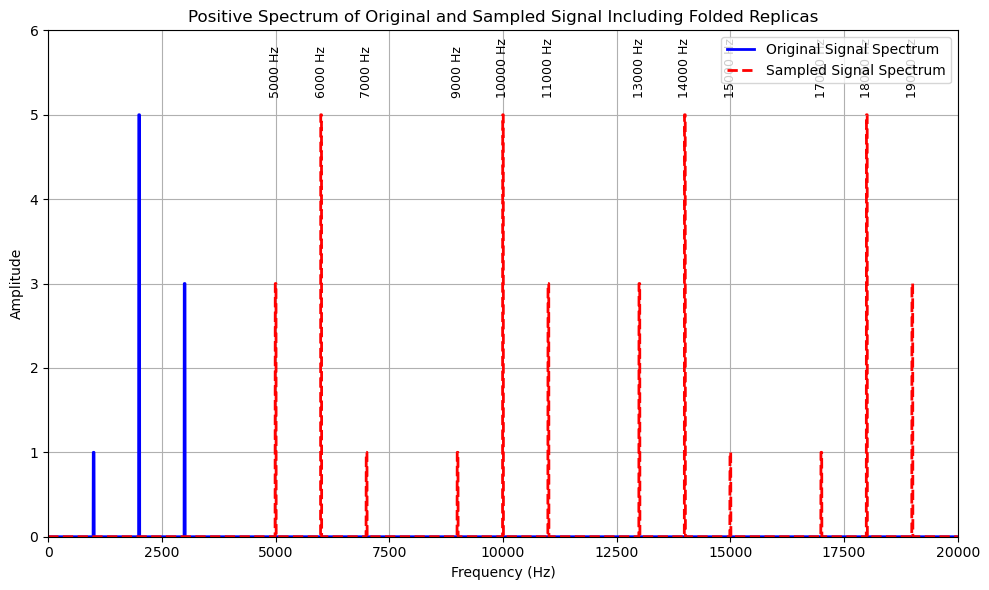

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
frequencies = [1000, 2000, 3000]  # List of original signal frequencies (in Hz)
amplitudes = [1, 5, 3]  # Corresponding amplitudes for each frequency
fs = 8000  # Sampling frequency (in Hz)

# Frequency range constant
FREQ_RANGE = 20000  # Frequency range (in Hz) for plotting from 0 to FREQ_RANGE

# Check Nyquist Criterion
f_max = max(frequencies)  # Maximum frequency in the signal
if fs < 2 * f_max:
    raise ValueError(
        f"Sampling frequency (fs={fs} Hz) must be at least twice the maximum signal frequency (2*f_max={2*f_max} Hz)."
    )

# Frequency range for plotting (Increase resolution to 5,000 points for positive side)
f_range = np.linspace(0, FREQ_RANGE, 5000)  # Positive side only

# Original signal spectrum: spikes at each frequency in the list with corresponding amplitudes
original_spectrum = np.zeros_like(f_range)
for f, amp in zip(frequencies, amplitudes):
    original_spectrum[np.abs(f_range - f) < 10] = amp  # Approximate spike at +f

# Sampled signal spectrum (replicating original spectrum at multiples of fs, including folded negative side replicas)
sampled_spectrum = np.zeros_like(f_range)
spike_freqs = []

# Adjust replication range based on FREQ_RANGE and fs
n_max = int(np.ceil(FREQ_RANGE / fs))  # Max range of replication for spikes

# Generate the replicated spectra for multiples of fs (both sides folded into positive frequencies)
for n in range(-n_max, n_max + 1):  # Include negative replicas
    for f, amp in zip(frequencies, amplitudes):
        # Positive-side frequency for both positive and negative replicas
        pos_freq = abs(n * fs + f)
        if pos_freq <= FREQ_RANGE:  # Only include within the plotting range
            sampled_spectrum[np.abs(f_range - pos_freq) < 10] = amp
            spike_freqs.append(pos_freq)

# Remove the original frequencies from the sampled signal spectrum
for f, amp in zip(frequencies, amplitudes):
    sampled_spectrum[np.abs(f_range - f) < 10] = 0  # Set original frequencies to zero in the sampled spectrum
    if f in spike_freqs:
        spike_freqs.remove(f)  # Remove original frequencies from the spike list

# Plotting the spectra
plt.figure(figsize=(10, 6))

# Plot the original signal spectrum
plt.plot(f_range, original_spectrum, label="Original Signal Spectrum", color="blue", lw=2)

# Plot the sampled signal spectrum
plt.plot(f_range, sampled_spectrum, label="Sampled Signal Spectrum", color="red", linestyle="--", lw=2)

# Adding text annotations for each spike
annotated_freqs = set()  # To avoid duplicate annotations
for freq in spike_freqs:
    if 0 <= freq <= FREQ_RANGE and freq not in annotated_freqs:  # Avoid duplicates
        plt.text(freq, max(amplitudes) + 0.2, f'{int(freq)} Hz', 
                 ha='center', va='bottom', color='black', fontsize=9, rotation=90)
        annotated_freqs.add(freq)

# Formatting the plot
plt.title("Positive Spectrum of Original and Sampled Signal Including Folded Replicas")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, FREQ_RANGE)  # Positive frequencies only
plt.ylim(0, max(amplitudes) + 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Filter : 

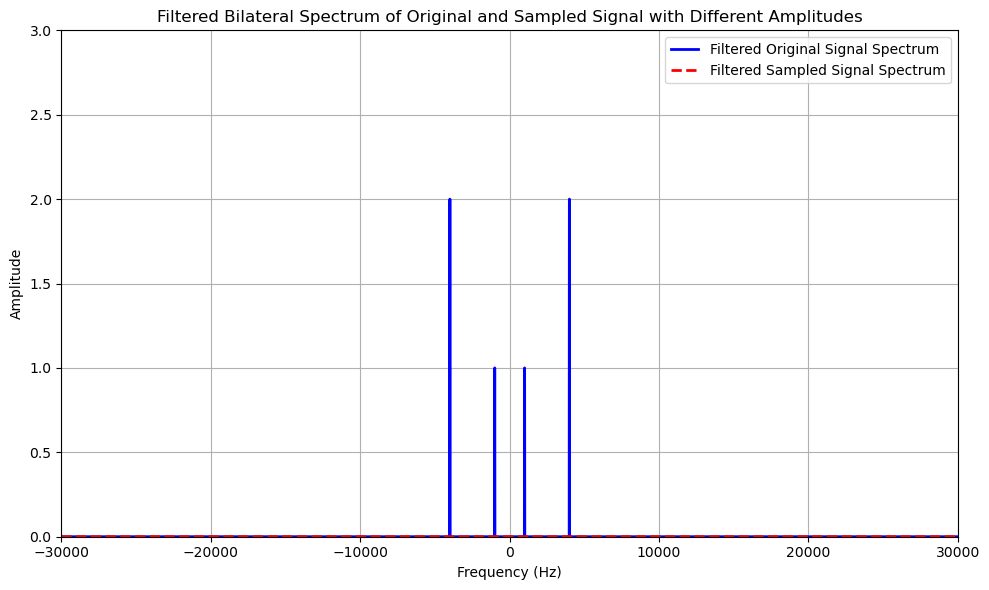

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
frequencies = [1000, 4000]  # List of original signal frequencies (in Hz)
amplitudes = [1, 2]  # Corresponding amplitudes for each frequency
fs = 20000  # Sampling frequency (in Hz)
fc = 8000  # Cutoff frequency for the lowpass filter (in Hz)

# Frequency range constant
FREQ_RANGE = 30000  # Frequency range (in Hz) for plotting from -FREQ_RANGE to FREQ_RANGE

# Check Nyquist Criterion
f_max = max(frequencies)  # Maximum frequency in the signal
if fs < 2 * f_max:
    raise ValueError(
        f"Sampling frequency (fs={fs} Hz) must be at least twice the maximum signal frequency (2*f_max={2*f_max} Hz)."
    )

# Frequency range for plotting (Increase resolution to 10,000 points)
f_range = np.linspace(-FREQ_RANGE, FREQ_RANGE, 10000)

# Original signal spectrum: spikes at each frequency in the list with corresponding amplitudes
original_spectrum = np.zeros_like(f_range)
for f, amp in zip(frequencies, amplitudes):
    original_spectrum[np.abs(f_range - f) < 10] = amp  # Approximate spike at +f
    original_spectrum[np.abs(f_range + f) < 10] = amp  # Approximate spike at -f

# Sampled signal spectrum (replicating original spectrum at multiples of fs, excluding original spikes)
sampled_spectrum = np.zeros_like(f_range)
spike_freqs = []

# Adjust replication range based on FREQ_RANGE and fs
n_max = int(np.ceil(FREQ_RANGE / fs))  # Max range of replication for spikes

# Generate the replicated spectra for multiples of fs (exclude n=0 for original frequencies)
for n in range(-n_max, n_max + 1):
    if n == 0:
        continue  # Skip n=0 to avoid duplicating original frequencies
    for f, amp in zip(frequencies, amplitudes):
        # Approximate spikes at f + n*fs and -f - n*fs
        sampled_spectrum[np.abs(f_range - (n * fs + f)) < 10] = amp
        sampled_spectrum[np.abs(f_range + (n * fs + f)) < 10] = amp
        
        # Store the spike frequencies for labeling
        spike_freqs.append(n * fs + f)
        spike_freqs.append(-n * fs - f)

# Create ideal lowpass filter
H = np.where(np.abs(f_range) <= fc, 1, 0)  # LPF filter for bilateral spectrum

# Apply the lowpass filter to the spectra
filtered_original_spectrum = original_spectrum * H
filtered_sampled_spectrum = sampled_spectrum * H

# Identify apparent spikes in the filtered sampled spectrum
apparent_spikes = f_range[filtered_sampled_spectrum > 0]

# Remove duplicate and near-zero spikes
apparent_spikes = np.unique(np.round(apparent_spikes, decimals=2))

# Plotting the spectra
plt.figure(figsize=(10, 6))

# Plot the filtered original signal spectrum
plt.plot(f_range, filtered_original_spectrum, label="Filtered Original Signal Spectrum", color="blue", lw=2)

# Plot the filtered sampled signal spectrum
plt.plot(f_range, filtered_sampled_spectrum, label="Filtered Sampled Signal Spectrum", color="red", linestyle="--", lw=2)

# Formatting the plot
plt.title("Filtered Bilateral Spectrum of Original and Sampled Signal with Different Amplitudes")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(-FREQ_RANGE, FREQ_RANGE)
plt.ylim(0, max(amplitudes) + 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

